# Using LAMMPS with iPython and Jupyter

LAMMPS can be run interactively using iPython easily. This tutorial shows how to set this up.

## Installation

1. Download the latest version of LAMMPS into a folder (we will calls this `$LAMMPS_DIR` from now on)
2. Compile LAMMPS as a shared library and enable PNG support
   ```bash
   cd $LAMMPS_DIR/src
   python2 Make.py -m mpi -png -a file
   make mode=shlib auto
   ```

3. Create a python virtualenv
   ```bash
   virtualenv testing
   source testing/bin/activate
   ```

4. Inside the virtualenv install the lammps package
   ```
   (testing) cd $LAMMPS_DIR/python
   (testing) python install.py
   (testing) cd   # move to your working directory
   ```

5. Install jupyter and ipython in the virtualenv
   ```bash
   (testing) pip install ipython jupyter
   ```

6. Run jupyter notebook
   ```bash
   (testing) jupyter notebook
   ```

## Example

In [1]:
from lammps import lammps, LammpsIPythonWrapper

In [2]:
lmp = lammps()
L = LammpsIPythonWrapper(lmp)

In [3]:
import math

# 3d Lennard-Jones melt

L.units("lj")
L.atom_style("atomic")
L.atom_modify("map array")

L.lattice("fcc", 0.8442)
L.region("box", "block", 0, 4, 0, 4, 0, 4)
L.create_box(1, "box")
L.create_atoms(1, "box")
L.mass(1, 1.0)

L.velocity("all", "create", 1.44, 87287, "loop geom")

L.pair_style("lj/cut", 2.5)
L.pair_coeff(1, 1, 1.0, 1.0, 2.5)

L.neighbor(0.3, "bin")
L.neigh_modify("delay", 0, "every", 20, "check no")

L.fix("1 all nve")

L.variable("fx atom fx")

L.info("all")

L.run(10)





'Neighbor list info ...\n  1 neighbor list requests\n  update every 20 steps, delay 0 steps, check no\n  max neighbors/atom: 2000, page size: 100000\n  master list distance cutoff = 2.8\n  ghost atom cutoff = 2.8\n  binsize = 1.4, bins = 5 5 5\nSetting up Verlet run ...\n  Unit style    : lj\n  Current step  : 0\n  Time step     : 0.005\nMemory usage per processor = 2.04486 Mbytes\nStep Temp E_pair E_mol TotEng Press \n       0         1.44   -6.7733681            0   -4.6218056   -5.0244179 \n      10    1.1298532   -6.3095502            0   -4.6213906   -2.6058175 \nLoop time of 0.00307202 on 1 procs for 10 steps with 256 atoms\n\nPerformance: 1406239.292 tau/day, 3255.184 timesteps/s\n108.5% CPU use with 1 MPI tasks x no OpenMP threads\n\nMPI task timing breakdown:\nSection |  min time  |  avg time  |  max time  |%varavg| %total\n---------------------------------------------------------------\nPair    | 0.0028288  | 0.0028288  | 0.0028288  |   0.0 | 92.08\nNeigh   | 0          | 0  

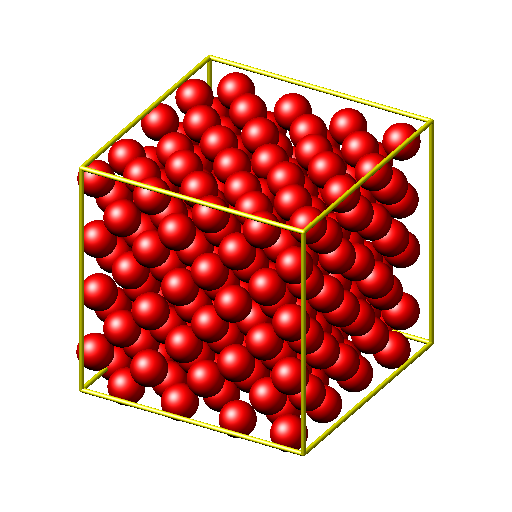

In [6]:
L.image(zoom=1.0)